# Đề bài
1 Phân loại Kh

2 Các yếu tố nào khiến Kh hủy dịch vụ

3 Công ty có thể làm gì để giữ chân Kh

4 Xây dựng mô hình dự đoán Kh dễ hủy dịch vụ


# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
link="https://drive.google.com/file/d/1M7JGEh_UCUILHJDdjP5uajjIyeVaoHM2/view?usp=drive_link"
path="https://drive.google.com/uc?export=download&id="+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4521,8671-KKKOS,Female,0,Yes,No,46,No,No phone service,DSL,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,45.55,2062.15,No
2795,0709-TVGUR,Female,1,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,622.9,Yes
4901,3765-JXVKY,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,74.7,Yes
5250,3338-CVVEH,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.55,1173.55,No
6606,6518-LGAOV,Female,0,Yes,No,38,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.00,4026.4,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [4]:
df['TotalCharges'].isnull().sum()

11

In [5]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df[df.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
columns =["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
              "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract",
              "PaperlessBilling","PaymentMethod","Churn"]
for column in columns:
    value_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: gender
Male      3549
Female    3483
Name: gender, dtype: int64

Column: SeniorCitizen
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Column: Partner
No     3639
Yes    3393
Name: Partner, dtype: int64

Column: Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64

Column: PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64

Column: MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Column: InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Column: OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Column: OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Column: DeviceProtection
No                     3094
Yes                    2418
No internet

83% kh thuộc lứa tuổi trẻ tuổi và trung niên (<60 tuổi)

70% kh là người độc thân/ đã có gia đình nhưng chưa có con cái

9.6% kh không đăng ký dịch vụ di động và 21.7% kh không đăng ký dịch vụ internet

55% kh đăng ký gói tháng, còn lại đăng ký đều ở gói 1 năm và 2 năm

33% kh thanh toán bằng hóa đơn điện tử, còn lại đăng ký đều bằng hình thức: chuyển khoản, mail và thẻ tín dụng.

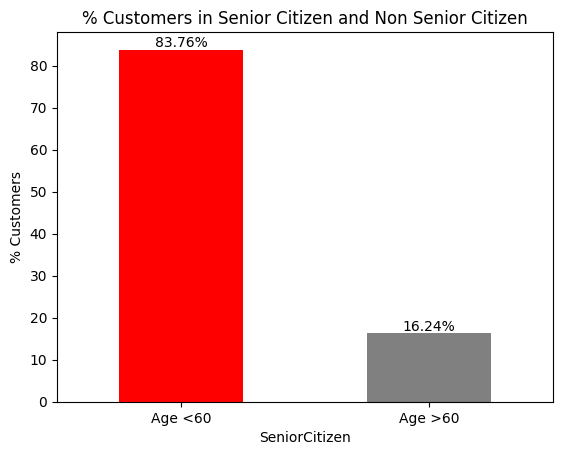

In [8]:
seniorcitizen_counts = df['SeniorCitizen'].value_counts().sort_index()
seniorcitizen_percentages = (seniorcitizen_counts / seniorcitizen_counts.sum()) * 100

x=seniorcitizen_percentages.plot(kind='bar', color=['red', 'grey'])
for p in x.patches:
    x.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel('SeniorCitizen')
plt.ylabel('% Customers')
plt.title('% Customers in Senior Citizen and Non Senior Citizen')
x.set_xticklabels(['Age <60', 'Age >60'], rotation=0)
plt.show()

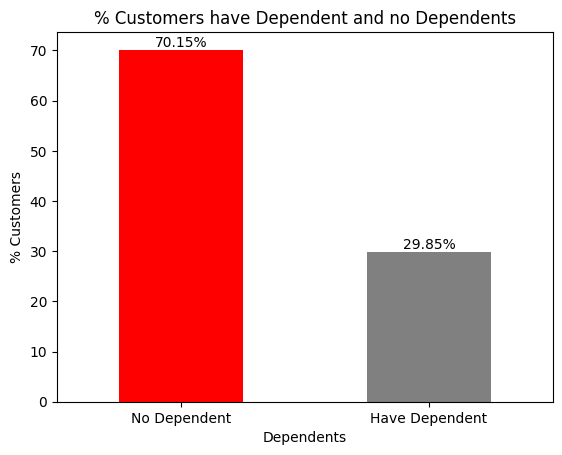

In [9]:
Dependents_counts = df['Dependents'].value_counts().sort_index()
Dependents_percentages = (Dependents_counts / Dependents_counts.sum()) * 100
x=Dependents_percentages.plot(kind='bar', color=['red', 'grey'])
for p in x.patches:
    x.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel('Dependents')
plt.ylabel('% Customers')
plt.title('% Customers have Dependent and no Dependents')
x.set_xticklabels(['No Dependent', 'Have Dependent'], rotation=0)
plt.show()

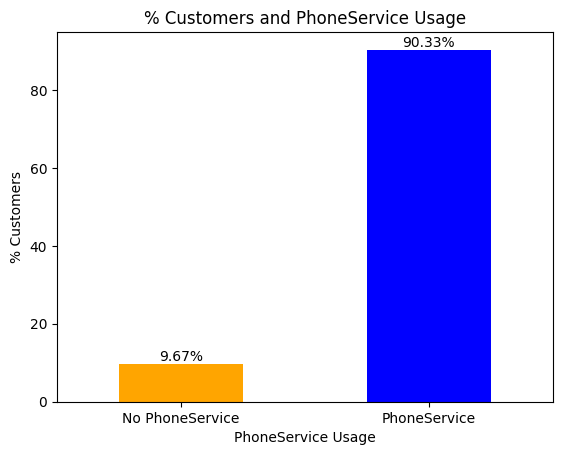

In [10]:
phoneservice_counts=df['PhoneService'].value_counts().sort_index()
phoneservice_percentages = (phoneservice_counts / phoneservice_counts.sum()) * 100
x=phoneservice_percentages.plot(kind='bar', color=['orange', 'blue'])
for p in x.patches:
    x.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel('PhoneService Usage')
plt.ylabel('% Customers')
plt.title('% Customers and PhoneService Usage')
x.set_xticklabels(['No PhoneService', 'PhoneService'], rotation=0)
plt.show()



In [11]:
df_internetservice=df[['InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']]
df_internetservice


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,No,No,No
1,DSL,Yes,No,Yes,No,No,No
2,DSL,Yes,Yes,No,No,No,No
3,DSL,Yes,No,Yes,Yes,No,No
4,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...
7038,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,DSL,Yes,No,No,No,No,No
7041,Fiber optic,No,No,No,No,No,No


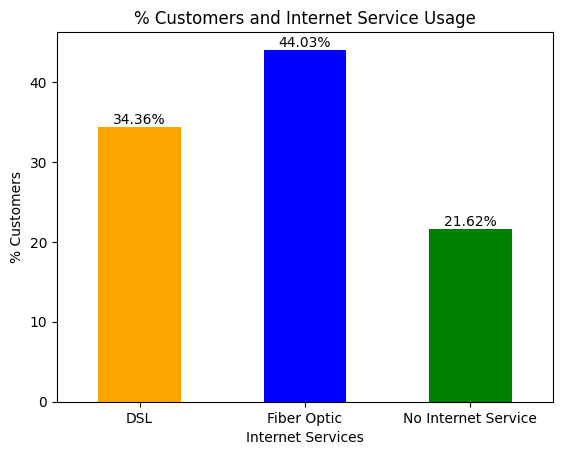

In [12]:
internetservice_counts=df['InternetService'].value_counts().sort_index()
internetservice_cpercentages = (internetservice_counts / internetservice_counts.sum()) * 100

x=internetservice_cpercentages.plot(kind='bar', color=['orange', 'blue', 'green'])

for p in x.patches:
    x.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Internet Services')
plt.ylabel('% Customers')
plt.title('% Customers and Internet Service Usage')
x.set_xticklabels(['DSL', 'Fiber Optic', 'No Internet Service'], rotation=0)
plt.show()


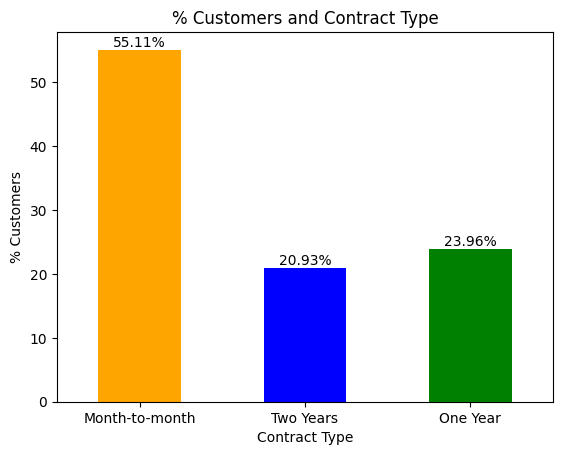

In [13]:
contract_counts=df['Contract'].value_counts().sort_index()
contract_cpercentages = (contract_counts / contract_counts.sum()) * 100

x=contract_cpercentages.plot(kind='bar', color=['orange', 'blue', 'green'])

for p in x.patches:
    x.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Contract Type')
plt.ylabel('% Customers')
plt.title('% Customers and Contract Type')
x.set_xticklabels(['Month-to-month', 'Two Years', 'One Year'], rotation=0)
plt.show()

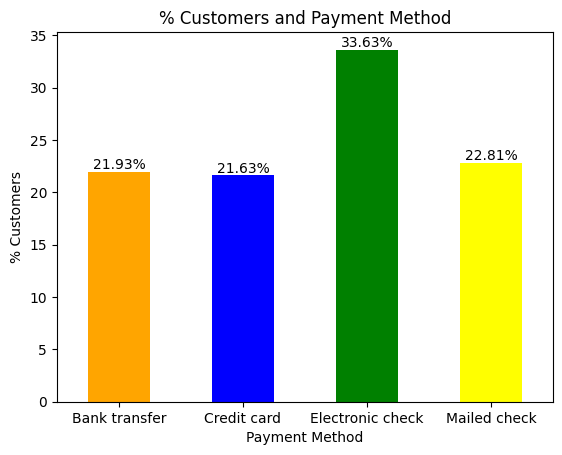

In [14]:
paymentmethod_counts=df['PaymentMethod'].value_counts().sort_index()
paymentmethod_cpercentages = (paymentmethod_counts / paymentmethod_counts.sum()) * 100

x=paymentmethod_cpercentages.plot(kind='bar', color=['orange', 'blue', 'green','yellow'])

for p in x.patches:
    x.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Payment Method')
plt.ylabel('% Customers')
plt.title('% Customers and Payment Method')
x.set_xticklabels(['Bank transfer', 'Credit card', 'Electronic check','Mailed check'], rotation=0)
plt.show()

11

In [15]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

<ipython-input-40-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-40-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-40-8c8257b32bab>:4: UserWarning: 

`distplot` is 

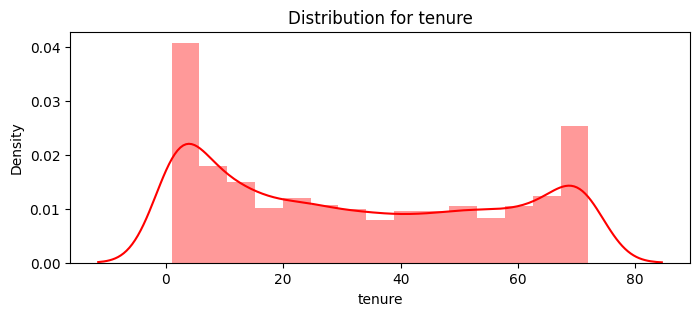

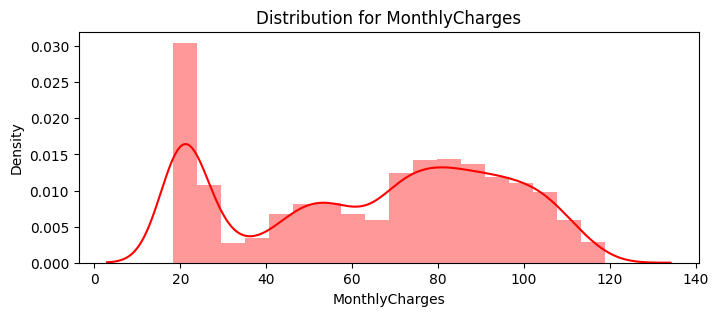

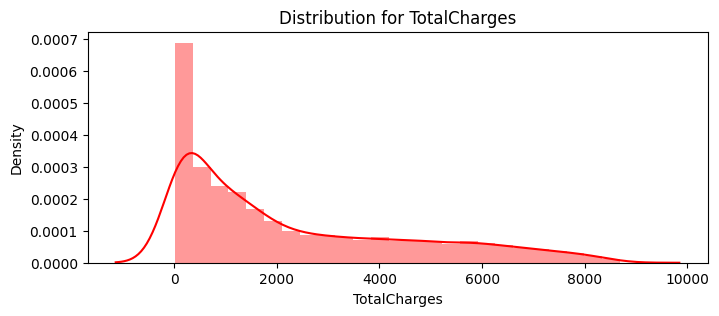

In [41]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2543,0952-KMEEH,Male,0,No,No,13,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,98.15,1230.25,Yes
6720,9530-GRMJG,Male,0,Yes,Yes,70,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.10,5979.70,No
1704,0107-YHINA,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.75,99.75,Yes
4262,5485-WUYWF,Male,1,No,No,2,Yes,No,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),66.40,94.55,Yes
5140,7577-SWIFR,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.25,89.25,No


In [16]:
label_encoder = LabelEncoder()

df['OnlineSecurity_Encoded'] = label_encoder.fit_transform(df["OnlineSecurity"])
df['OnlineBackup_Encoded'] = label_encoder.transform(df["OnlineBackup"])
df['DeviceProtection_Encoded'] = label_encoder.transform(df["DeviceProtection"])
df['TechSupport_Encoded'] = label_encoder.transform(df["TechSupport"])
df['StreamingTV_Encoded'] = label_encoder.transform(df["StreamingTV"])
df['StreamingMovies_Encoded'] = label_encoder.transform(df["StreamingMovies"])
df['Partner_Encoded'] = label_encoder.transform(df["Partner"])
df['Dependents_Encoded'] = label_encoder.transform(df["Dependents"])



In [17]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,StreamingTV_Encoded,StreamingMovies_Encoded,Partner_Encoded,Dependents_Encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,0,2,0,0,0,0,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.50,No,2,0,2,0,0,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,Yes,2,2,0,0,0,0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,No,2,0,2,2,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,Yes,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7032 non-null   object 
 1   gender                    7032 non-null   object 
 2   SeniorCitizen             7032 non-null   int64  
 3   Partner                   7032 non-null   object 
 4   Dependents                7032 non-null   object 
 5   tenure                    7032 non-null   int64  
 6   PhoneService              7032 non-null   object 
 7   MultipleLines             7032 non-null   object 
 8   InternetService           7032 non-null   object 
 9   OnlineSecurity            7032 non-null   object 
 10  OnlineBackup              7032 non-null   object 
 11  DeviceProtection          7032 non-null   object 
 12  TechSupport               7032 non-null   object 
 13  StreamingTV               7032 non-null   object 
 14  Streamin

In [18]:
customer_segmentation=df[['SeniorCitizen','Partner_Encoded','Dependents_Encoded','tenure','OnlineSecurity_Encoded',
                        'OnlineBackup_Encoded','DeviceProtection_Encoded','TechSupport_Encoded','StreamingTV_Encoded',
                        'StreamingMovies_Encoded','InternetService','Contract','PaymentMethod','MultipleLines','PhoneService',
                          'MonthlyCharges', 'TotalCharges']]
customer_segmentation


,SeniorCitizen,Partner_Encoded,Dependents_Encoded,tenure,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,StreamingTV_Encoded,StreamingMovies_Encoded,InternetService,Contract,PaymentMethod,MultipleLines,PhoneService,MonthlyCharges,TotalCharges
0,0,2,0,1,0,2,0,0,0,0,DSL,Month-to-month,Electronic check,No phone service,No,29.85,29.85
1,0,0,0,34,2,0,2,0,0,0,DSL,One year,Mailed check,No,Yes,56.95,1889.50
2,0,0,0,2,2,2,0,0,0,0,DSL,Month-to-month,Mailed check,No,Yes,53.85,108.15
3,0,0,0,45,2,0,2,2,0,0,DSL,One year,Bank transfer (automatic),No phone service,No,42.30,1840.75
4,0,0,0,2,0,0,0,0,0,0,Fiber optic,Month-to-month,Electronic check,No,Yes,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,2,2,24,2,0,2,2,2,2,DSL,One year,Mailed check,Yes,Yes,84.80,1990.50
7039,0,2,2,72,0,2,2,0,2,2,Fiber optic,One year,Credit card (automatic),Yes,Yes,103.20,7362.90
7040,0,2,2,11,2,0,0,0,0,0,DSL,Month-to-month,Electronic check,No phone service,No,29.60,346.45
7041,1,2,0,4,0,0,0,0,0,0,Fiber optic,Month-to-month,Mailed check,Yes,Yes,74.40,306.60


In [19]:
customer_segmentation_encoded=pd.get_dummies(customer_segmentation, columns=['InternetService','Contract','PaymentMethod','MultipleLines','PhoneService'])
customer_segmentation_encoded.head(5)

,SeniorCitizen,Partner_Encoded,Dependents_Encoded,tenure,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,StreamingTV_Encoded,StreamingMovies_Encoded,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,PhoneService_No,PhoneService_Yes
0,0,2,0,1,0,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,0,34,2,0,2,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,0,0,0,2,2,2,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
3,0,0,0,45,2,0,2,2,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [20]:
customer_segmentation_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner_Encoded                          7032 non-null   int64  
 2   Dependents_Encoded                       7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   OnlineSecurity_Encoded                   7032 non-null   int64  
 5   OnlineBackup_Encoded                     7032 non-null   int64  
 6   DeviceProtection_Encoded                 7032 non-null   int64  
 7   TechSupport_Encoded                      7032 non-null   int64  
 8   StreamingTV_Encoded                      7032 non-null   int64  
 9   StreamingMovies_Encoded                  7032 non-null   int64  
 10  MonthlyCharges                           7032 no

In [21]:
customer_segmentation_encoded['Partner_Encoded'].value_counts()

0    3639
2    3393
Name: Partner_Encoded, dtype: int64

# Model

In [22]:
X = customer_segmentation_encoded.iloc[:,:].values


In [23]:
si = []
for k in range(2, 20, 1):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  si.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
si

[0.702941726191343,
 0.6445837165359258,
 0.601824844202574,
 0.5965883641957634,
 0.5948170473415358,
 0.5834893592343567,
 0.5706270677705901,
 0.565750118813318,
 0.5629493121300229,
 0.5614260220645428,
 0.5599798162241415,
 0.5494347877919743,
 0.5497297829472507,
 0.5492493055366467,
 0.5350078657034028,
 0.5368613274433329,
 0.5344453759911951,
 0.5366911186514414]

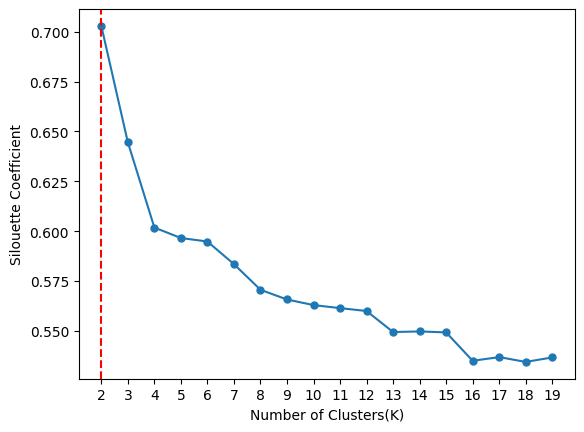

In [25]:
plt.plot(range(2,20), si, '.-', markersize=10)
plt.xticks(range(2,20))
plt.axvline(x=2, color='r', linestyle='--')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Silouette Coefficient")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [27]:
y_pred = kmeans.fit_predict(X)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [28]:
cluster_centers = kmeans.cluster_centers_
cluster_analysis = pd.DataFrame(cluster_centers, columns=customer_segmentation_encoded.columns)
cluster_analysis.index.name = "Cluster"
pd.set_option('display.max_columns', None)
print(cluster_analysis)

         SeniorCitizen  Partner_Encoded  Dependents_Encoded     tenure  \
Cluster                                                                  
0             0.211962         1.367464            0.670813  58.951675   
1             0.141441         0.794820            0.565763  21.202145   

         OnlineSecurity_Encoded  OnlineBackup_Encoded  \
Cluster                                                 
0                      1.085167              1.349282   
1                      0.664104              0.718333   

         DeviceProtection_Encoded  TechSupport_Encoded  StreamingTV_Encoded  \
Cluster                                                                       
0                        1.367464             1.114833             1.449761   
1                        0.707811             0.661675             0.788345   

         StreamingMovies_Encoded  MonthlyCharges  TotalCharges  \
Cluster                                                          
0                       1

In [29]:
cluster_analysis

,SeniorCitizen,Partner_Encoded,Dependents_Encoded,tenure,OnlineSecurity_Encoded,OnlineBackup_Encoded,DeviceProtection_Encoded,TechSupport_Encoded,StreamingTV_Encoded,StreamingMovies_Encoded,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,PhoneService_No,PhoneService_Yes
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.211962,1.367464,0.670813,58.951675,1.085167,1.349282,1.367464,1.114833,1.449761,1.456459,91.216316,5363.158756,0.332057,0.667943,3.441691e-15,0.260766,0.305263,0.433971,0.318182,0.309569,0.299043,0.073206,0.230144,0.045455,0.724402,0.045455,0.954545
1,0.141441,0.794820,0.565763,21.202145,0.664104,0.718333,0.707811,0.661675,0.788345,0.796843,53.625840,980.810785,0.348442,0.343990,3.075678e-01,0.673816,0.168758,0.157426,0.177459,0.176851,0.352084,0.293606,0.587616,0.118373,0.294011,0.118373,0.881627


In [32]:
customer_segmentation_encoded['Class']=y_pred

In [33]:
customer_segmentation_encoded['Class'].value_counts()

1    4942
0    2090
Name: Class, dtype: int64

Nhóm 0: Kh chi tiêu cao cho dịch vụ viễn thông

- Kh sử dung phone service kèm multiple lines, có xu hướng đăng ký các dịch vụ internet kèm theo như: phim, TV, hỗ trợ kỹ thuật, bảo trì thiết bị, dịch vụ an ninh mạng.
- Họ có xu hướng thanh toán tự động (chuyển khoản/ thẻ tín dụng).

- Nhóm Kh này chủ yếu đăng ký dịch vụ theo năm và đã có thời gian sử dụng dịch vụ lâu rồi.

- Đa số Kh nhóm này là người cao tuổi, đã có gia đình và có người lệ thuộc về tài chính.

=> Tiếp tục duy trì dịch vụ tốt với nhóm Kh này.

Nhóm 1: Kh chi tiêu thấp cho dịch vụ viễn thông

- Kh k sử dụng phone service/ có nhưng không kèm multiple lines, không có xu hướng đăng ký các dịch vụ internet kèm theo.

- Họ có xu hướng thanh toán bằng mail/ hóa đơn.

- Họ thường đăng ký gói tháng và thời gian sử dụng dịch vụ ngắn hơn.

- Họ thường là người trẻ/ trung niên, người chưa có gia đình và chưa có người lệ thuộc về tài chính.

=> Đưa ra các gói dịch vụ riêng biệt cho từng phân khúc phụ trong nhóm kh này để đưa ra chi phí hợp lý nhưng đáp ứng được nhu cầu của họ như: nhóm kh là người độc thân/ nhóm kh đã lập gia đình nhưng chưa có con nhỏ/ nhóm kh có con nhỏ. Đưa ra ưu đãi khi thanh toán bằng hình thức chuyển khoản/ thẻ tín dụng để đẩy nhanh qt thanh toán.